# **Bank Customer  Prediction**


### **Data Preeprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srs

%matplotlib inline

In [4]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

### **Chack The NullVelues**

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Feature Enginnering**

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.drop('CustomerId', axis=1,inplace=True)

In [9]:
data.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data = data[['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [13]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
data.shape

(10000, 13)

## **Coreletions & Heat Map**

In [17]:
data.corr()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
RowNumber,1.000000,0.005840,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905
CreditScore,0.005840,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,0.018196,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,0.000783,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,-0.006495,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,-0.009067,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.007246,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,0.000599,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.012044,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.005988,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482


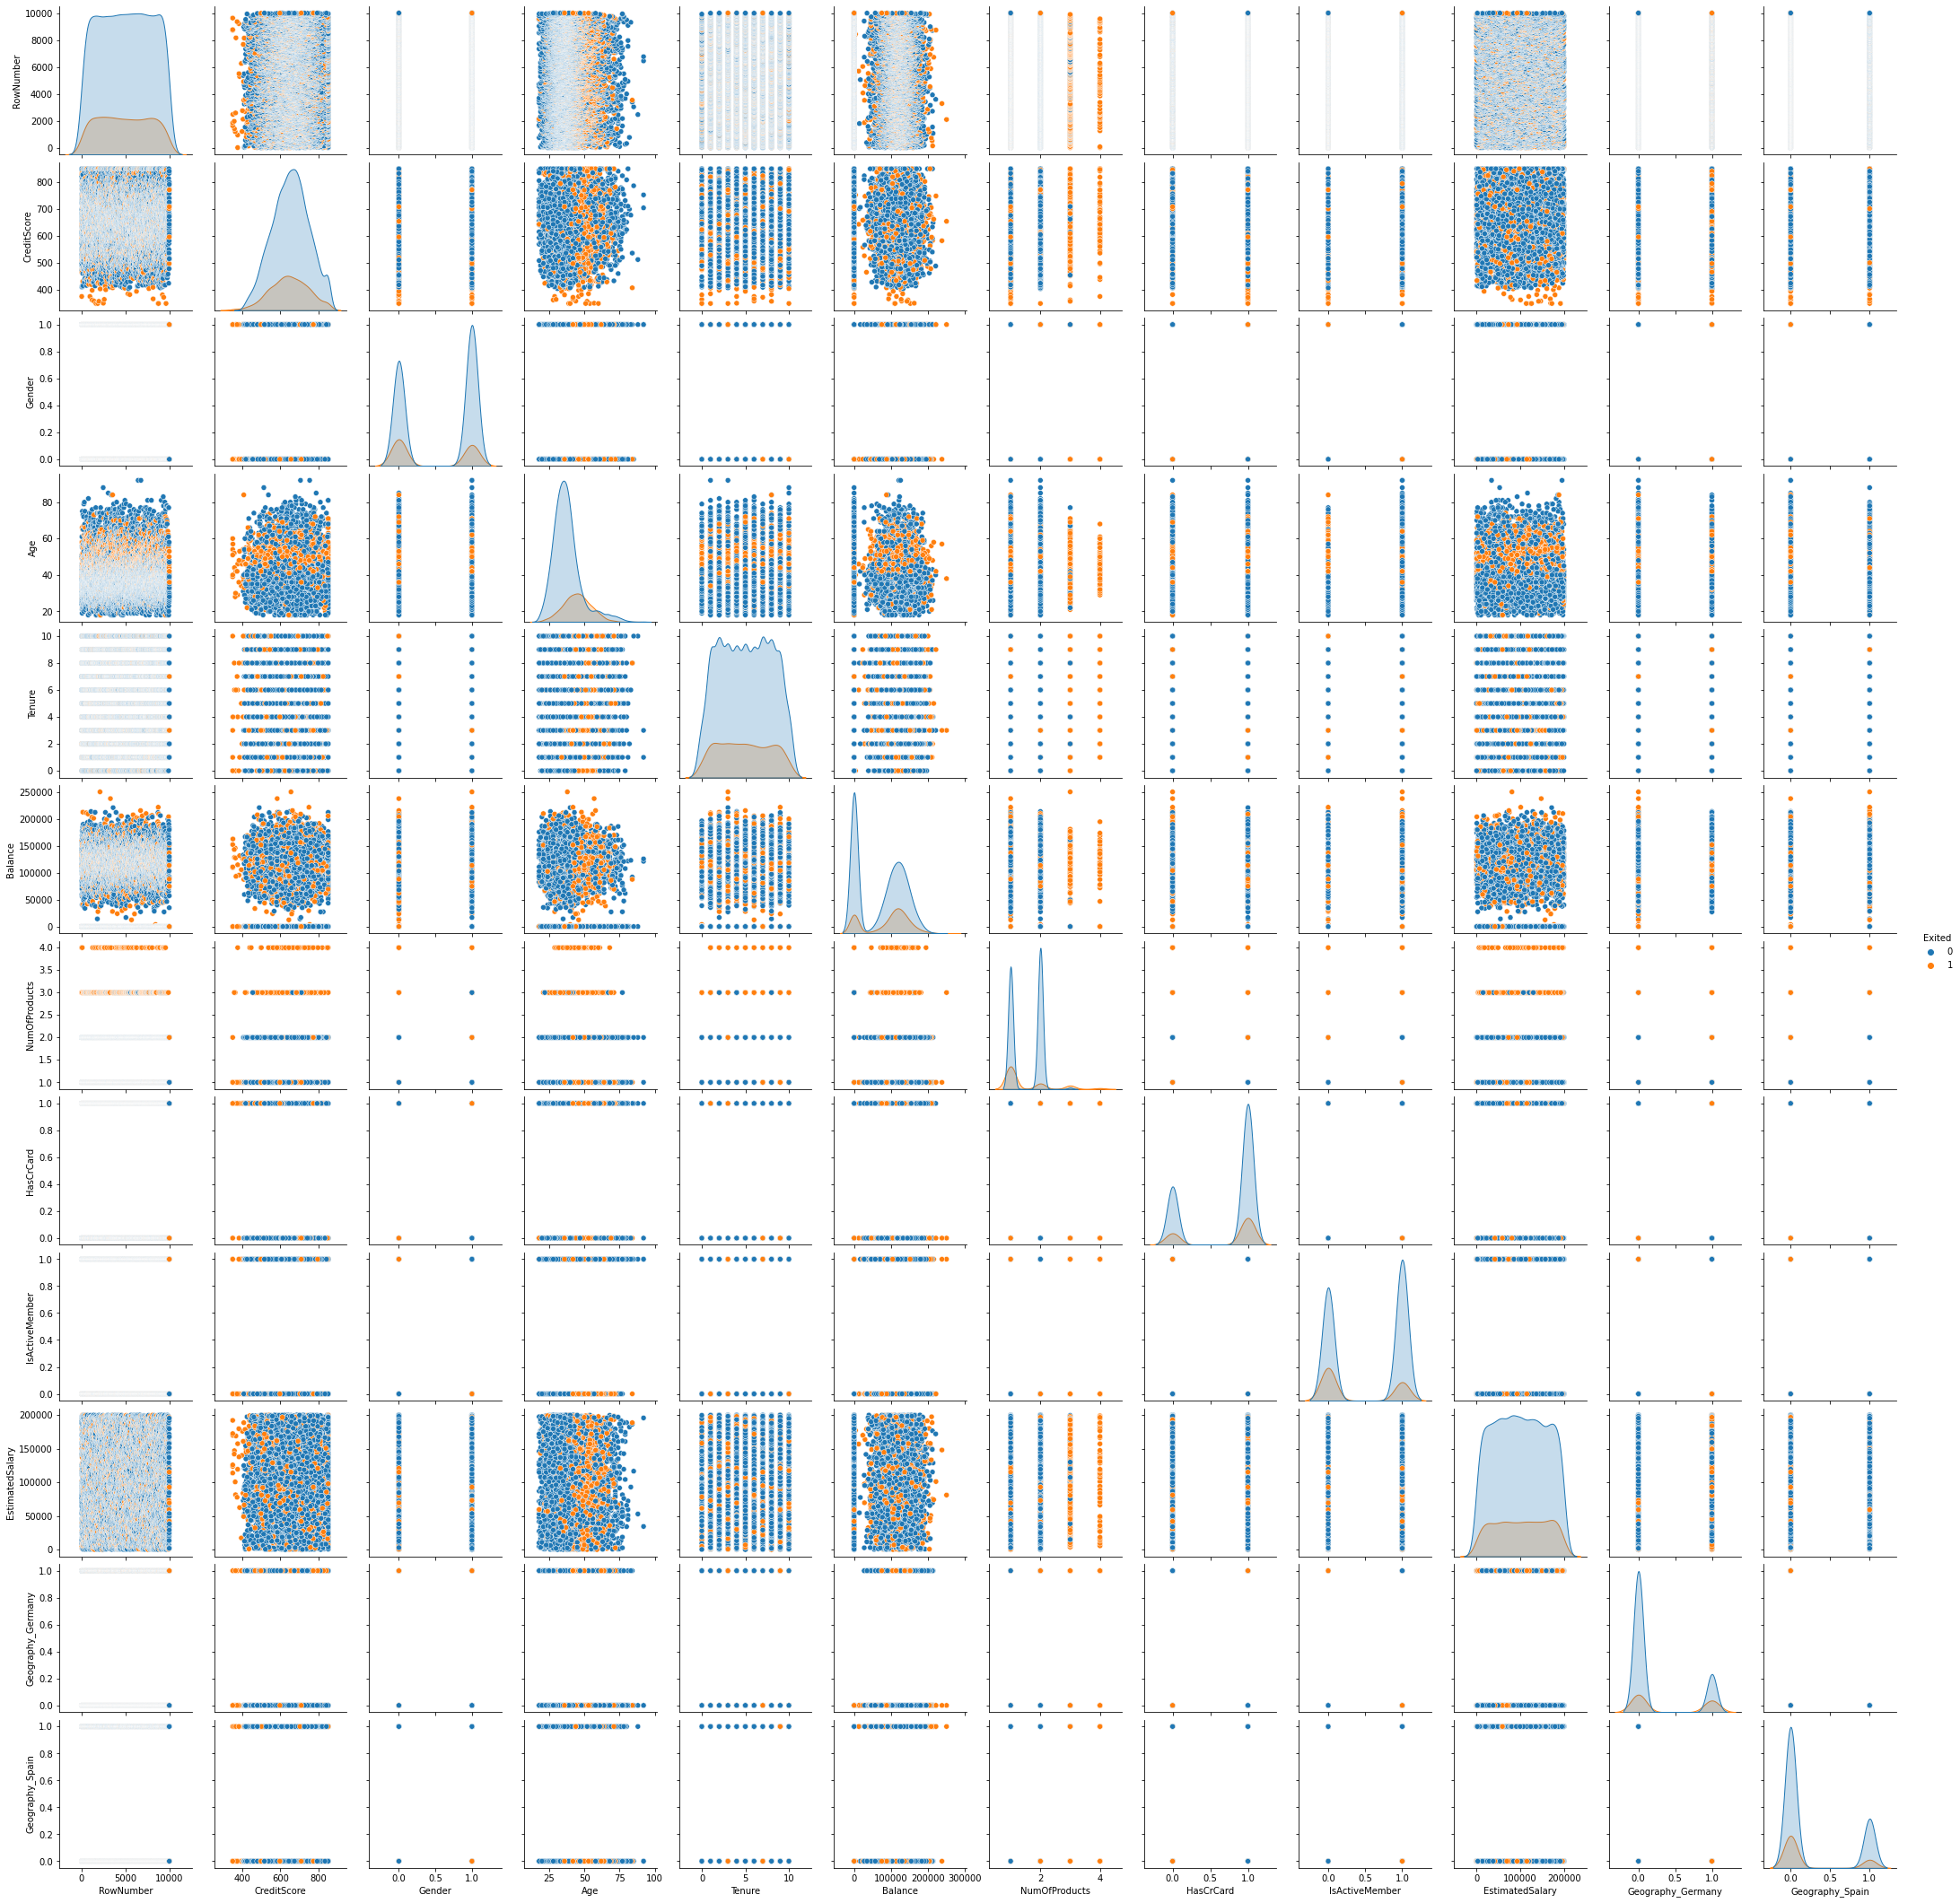

In [20]:
srs.pairplot(data, hue='Exited')

## **Applay Algoridham**

In [21]:
X =  data.drop('Exited', axis=1)
y = data['Exited']


In [22]:
X.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [23]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## **X,y Splite**

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
print(model.feature_importances_)

[0.10869381 0.10962738 0.01792721 0.21101783 0.08901939 0.11412764
 0.13820788 0.02325615 0.03741816 0.10820499 0.0294139  0.01308567]


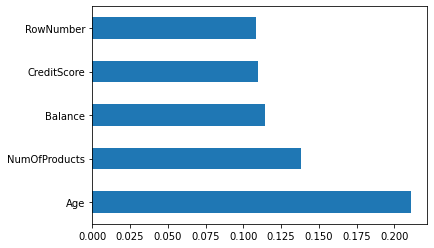

In [27]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

## **Apply Algoridhams** 

### **Train-Test Splite**

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

In [49]:
from xgboost import XGBClassifier
classifire = XGBClassifier()
classifire.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
classifire.score(X_test,y_test)

0.876

### **K Fold CV**

In [38]:
from sklearn.model_selection import cross_val_score
classifire = XGBClassifier()


In [51]:
score = cross_val_score(classifire, X, y, cv=10, scoring = 'accuracy')
print(score)

[0.874 0.86  0.871 0.865 0.863 0.85  0.868 0.88  0.858 0.819]


In [52]:
print(score.mean())

0.8608
